In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
types = pd.read_csv(r'C:\Users\aitpa\Desktop\IRDM week 8\datasets\types.csv', sep=';')
codes = pd.read_csv(r'C:\Users\aitpa\Desktop\IRDM week 8\datasets\codes.csv',sep =';')
transactions = pd.read_csv(r'C:\Users\aitpa\Desktop\IRDM week 8\datasets\transactions.csv', sep =';')
train_set = pd.read_csv(r'C:\Users\aitpa\Desktop\IRDM week 8\datasets\train_set.csv',sep=';')
test_set = pd.read_csv(r'C:\Users\aitpa\Desktop\IRDM week 8\datasets\test_set.csv', sep=';')

# Dataset exploring

## Transactions

### Descriptive Analysis

In [36]:
transactions.describe()

,client_id,code,type,sum
count,1.300100e+05,130010.000000,130010.000000,1.300100e+05
mean,5.087013e+07,5594.426013,2489.449988,-1.812491e+04
std,2.872962e+07,605.688573,2253.295592,5.585007e+05
min,2.289900e+04,742.000000,1000.000000,-4.150030e+07
25%,2.577174e+07,5211.000000,1030.000000,-2.245169e+04
50%,5.235837e+07,5641.000000,1110.000000,-5.502490e+03
75%,7.506302e+07,6010.000000,2370.000000,-1.122960e+03
max,9.999968e+07,9402.000000,8145.000000,6.737747e+07


In [37]:
transactions.median() #median

client_id    52358368.00
code             5641.00
type             1110.00
sum             -5502.49
dtype: float64

In [41]:
transactions.mode() #mode

,client_id,datetime,code,type,sum
0,70780820,456 00:00:00,6011,1010,-2245.92


In [43]:
max(transactions['sum'])-min(transactions['sum']) #Measures of spread

108877774.3

In [46]:
transactions['sum'].quantile(0.75)-transactions['sum'].quantile(0.25) #IQR

21328.732500000002

(-60000.0, 35000.0)

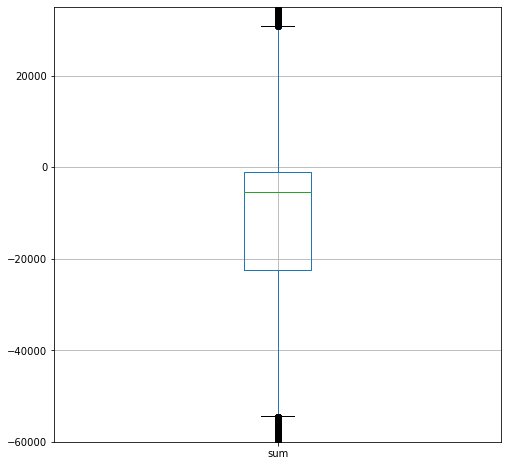

In [54]:
transactions.boxplot(column='sum', return_type='axes', figsize=(8,8))
plt.ylim(-60000,35000)

In [55]:
transactions['sum'].var() #variance

311923038794.3945

In [57]:
 transactions['sum'].std() #standard deviation

558500.7061717957

### Explanatory Data Analysis

In [4]:
# 2. Understanding the data ################################################################################################

In [5]:
transactions.head()

,client_id,datetime,code,type,sum
0,96372458,421 06:33:15,6011,2010,-561478.94
1,24567813,377 17:20:40,6011,7010,67377.47
2,21717441,55 13:38:47,6011,2010,-44918.32
3,14331004,263 12:57:08,6011,2010,-3368873.66
4,85302434,151 10:34:12,4814,1030,-3368.87


In [6]:
transactions.tail()

,client_id,datetime,code,type,sum
130034,15836839,147 11:50:53,5411,1010,-26344.59
130035,28369355,305 11:59:34,4829,2330,-24705.07
130036,40949707,398 21:13:58,5411,1110,-40353.72
130037,7174462,409 13:58:14,5411,1010,-25536.06
130038,92197764,319 00:00:00,5533,1110,-12127.95


In [7]:
transactions.shape

(130039, 5)

In [8]:
transactions.columns

Index(['client_id', 'datetime', 'code', 'type', 'sum'], dtype='object')

In [9]:
transactions.nunique()

client_id      8656
datetime     114770
code            175
type             67
sum           27450
dtype: int64

In [10]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130039 entries, 0 to 130038
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   client_id  130039 non-null  int64  
 1   datetime   130039 non-null  object 
 2   code       130039 non-null  int64  
 3   type       130039 non-null  int64  
 4   sum        130039 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 5.0+ MB


In [11]:
# 1. Cleaning the data ################################################################################################

In [12]:
transactions.isnull().sum()

client_id    0
datetime     0
code         0
type         0
sum          0
dtype: int64

In [13]:
clients = np.array(transactions['client_id'].unique())
clients

array([96372458, 24567813, 21717441, ..., 44107368, 54180380, 12610287],
      dtype=int64)

In [14]:
len(clients)

8656

In [15]:
transactions.drop_duplicates(inplace=True)

In [16]:
# 3. Realtionship analysis ################################################################################################

In [17]:
correlation = transactions.corr()

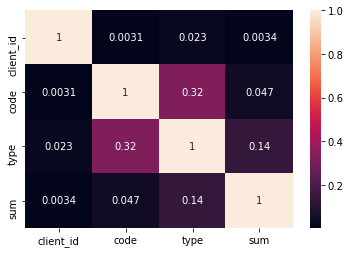

In [18]:
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels=correlation.columns, annot=True)
plt.show()

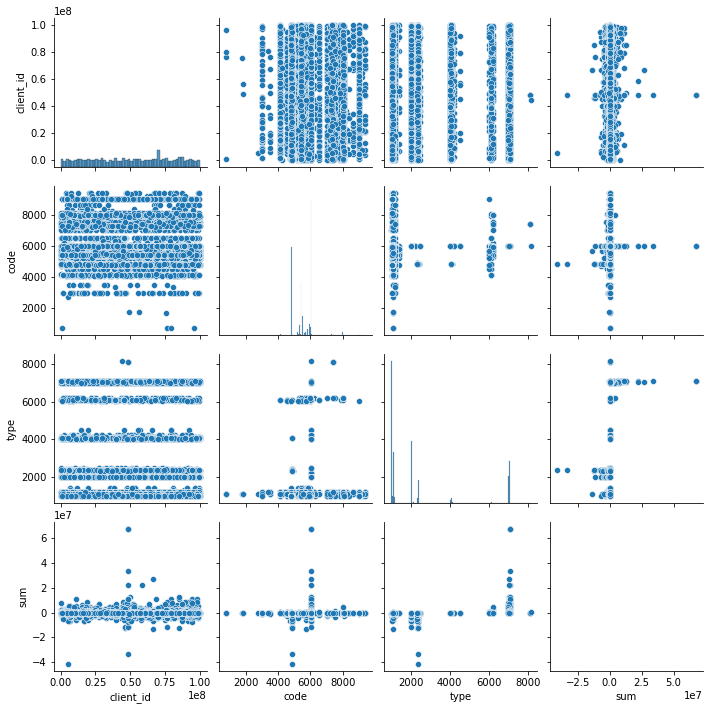

In [19]:
sns.pairplot(transactions)

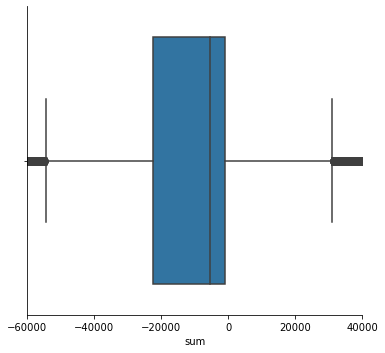

In [20]:
sns.catplot(x='sum',kind='box',data=transactions )
plt.xlim(-60000,40000)
plt.show()

### Feature Engineering

In [21]:
get_the_day = lambda x:int(x.split()[0])
days = transactions['datetime'].apply(get_the_day)


In [22]:
print('maximum is',days.max())
print('minimum is',days.min())

maximum is 456
minimum is 0


In [23]:
ndays = days.max()+1

In [24]:
days.drop_duplicates(inplace=True)

In [25]:
days.sort_values(inplace=True)
days = (days+1).to_list()

In [26]:
ndays

457

In [27]:
start = datetime.datetime(2021,1,1)
end = datetime.datetime(2022,4,3)
step = datetime.timedelta(days=1)
result=[]

while start < end:
    result.append(start.strftime('%Y-%m-%d'))
    start+=step

In [28]:
ndays

457

In [29]:
right_days = {}
for i in range(0,ndays):
    right_days[i]=result[i]


In [30]:
transactions.head()

,client_id,datetime,code,type,sum
0,96372458,421 06:33:15,6011,2010,-561478.94
1,24567813,377 17:20:40,6011,7010,67377.47
2,21717441,55 13:38:47,6011,2010,-44918.32
3,14331004,263 12:57:08,6011,2010,-3368873.66
4,85302434,151 10:34:12,4814,1030,-3368.87


In [31]:
for i in transactions['datetime']:
    for j in right_days.keys():
        if int(i.split()[0])==j:
            i.replace(i.split()[0],right_days[j])

In [32]:
transactions.head()

,client_id,datetime,code,type,sum
0,96372458,421 06:33:15,6011,2010,-561478.94
1,24567813,377 17:20:40,6011,7010,67377.47
2,21717441,55 13:38:47,6011,2010,-44918.32
3,14331004,263 12:57:08,6011,2010,-3368873.66
4,85302434,151 10:34:12,4814,1030,-3368.87
